# アタポン
* アタポンのデータに絞る
* 平滑化トレンドモデルにしてみる

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df_all = pd.read_pickle(input_dir + 'b1_output_df.pkl')
df_all

,week,イベント,2001位,形式,日付,属性,期間
0,2015-09-21,アタシポンコツアンドロイド,78330.0,アタポン,2015-09-25,NaN,249.0
1,2015-09-28,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-19,Nation Blue,67627.0,アタポン,2015-10-19,NaN,198.0
...,...,...,...,...,...,...,...
252,2020-07-20,太陽の絵の具箱,107142.0,アタポン,2020-07-20,NaN,174.0
253,2020-07-27,NaN,NaN,NaN,NaN,NaN,NaN
254,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN
255,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 目的変数が欠損してない行のみ取り出す
df = df_all[~(df_all['2001位'].isnull())].reset_index(drop=True)
df

,week,イベント,2001位,形式,日付,属性,期間
0,2015-09-21,アタシポンコツアンドロイド,78330.0,アタポン,2015-09-25,NaN,249.0
1,2015-10-19,Nation Blue,67627.0,アタポン,2015-10-19,NaN,198.0
2,2015-11-16,Orange Sapphire,42944.0,アタポン,2015-11-20,NaN,150.0
3,2015-12-14,Snow Wings,50954.0,アタポン,2015-12-18,NaN,222.0
4,2016-01-18,パステルピンクな恋,43854.0,アタポン,2016-01-20,NaN,174.0
5,2016-02-15,オルゴールの小箱,56737.0,アタポン,2016-02-18,NaN,174.0
6,2016-03-14,絶対特権主張しますっ！,51353.0,アタポン,2016-03-20,NaN,174.0
7,2016-04-18,つぼみ,47907.0,アタポン,2016-04-19,NaN,174.0
8,2016-05-16,明日また会えるよね,58517.0,アタポン,2016-05-19,NaN,198.0
9,2016-06-20,咲いてJewel,77930.0,アタポン,2016-06-20,NaN,174.0


## stanデータ準備

In [5]:
# 欠損でない位置のindex番号+1
# stanは0ではなく1スタートなので+1してる
obs_no = list(map(lambda x: x+1, df_all[(~(df_all['2001位'].isnull()))].index.tolist()))

In [6]:
# データ（辞書型）
dat = {
    'T':       len(df_all),         # 全日付の日数
    'len_obs': len(df),               # データがある日付の日数
    'y':       df['2001位'].tolist(), # 観測値
    'obs_no':  obs_no,                # 観測値がある場所（あったらTrue、欠損だとFalse）
}

In [7]:
# Stanコード
model = """
data {
  int T;               // データ取得期間の長さ
  int len_obs;         // 観測値が得られた個数
  vector[len_obs] y;   // 観測値
  int obs_no[len_obs]; // 観測値が得られた時点
}
parameters {
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
  }
  for(i in 1:len_obs){
    y[i] ~ normal(mu[obs_no[i]], s_v);
  }
}
"""

# Stan実行

In [8]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bfca852e64302becfb2a710da3141189 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpt9kcbylv\stanfit4anon_model_bfca852e64302becfb2a710da3141189_8419895985809452857.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 24.1 s


In [9]:
# パラメータ設定
n_itr = 10000
n_warmup = n_itr - 1000
chains = 3

In [10]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 5min 57s


In [11]:
# 時間かかるのでfit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'b2_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


In [12]:
# 読み込み
with open(save_dir + 'b2_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [13]:
fit

Inference for Stan model: anon_model_bfca852e64302becfb2a710da3141189.
3 chains, each with iter=10000; warmup=9000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       5.5e4  1145.6  1.6e4  2.3e4  4.4e4  5.6e4  6.7e4  8.7e4    203   1.02
mu[1]       5.6e4  1118.2  1.6e4  2.4e4  4.5e4  5.6e4  6.7e4  8.7e4    205   1.02
mu[2]       5.6e4  1078.1  1.6e4  2.5e4  4.5e4  5.6e4  6.7e4  8.6e4    210   1.02
mu[3]       5.6e4  1043.7  1.5e4  2.6e4  4.6e4  5.7e4  6.7e4  8.5e4    214   1.02
mu[4]       5.6e4  1021.1  1.5e4  2.7e4  4.6e4  5.7e4  6.7e4  8.5e4    214   1.02
mu[5]       5.7e4  997.39  1.5e4  2.9e4  4.7e4  5.7e4  6.7e4  8.4e4    214   1.02
mu[6]       5.7e4  972.62  1.4e4  2.9e4  4.7e4  5.7e4  6.7e4  8.4e4    215   1.02
mu[7]       5.7e4  951.49  1.4e4  3.0e4  4.7e4  5.7e4  6.7e4  8.3e4    215   1.02
mu[8]       5.7e4  933.72  1.4e4  3.1e4  4.7e4  5.8e4  6.7e4  8.2e4    2

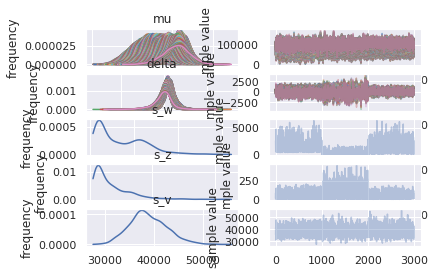

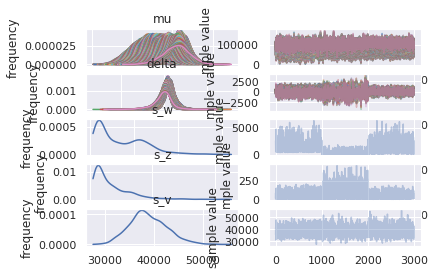

In [14]:
fit.plot()

In [15]:
#結果を抽出
ms = fit.extract() 

#mu
# 事後平均
mu_mean = ms['mu'].mean(axis=0)
# #95パーセンタイル抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.week
X_all = df_all.week

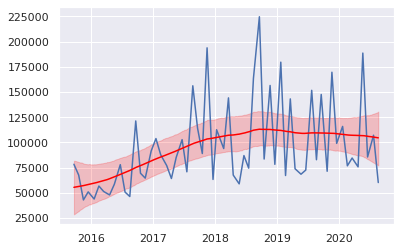

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X_all, mu_mean, label='predicted trend', c='red')
plt.fill_between(X_all, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

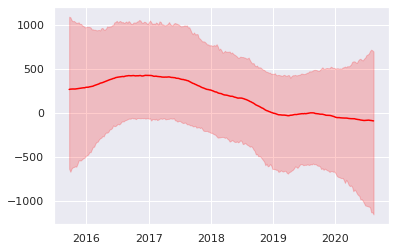

In [17]:
# delta
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X_all, delta_mean, label='predicted trend', c='red')
plt.fill_between(X_all, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

ローカルレベルからあまり変わっていないが、少し滑らかにはなっているか？